In [1]:
from functions import *

%load_ext autoreload
%autoreload 2

In [2]:
if os.path.exists('AD_common_res'):
    pass
else:
    os.mkdir('AD_common_res')

Read all the files

In [3]:
event_param_cell1 = pd.read_csv('Cell 1 ad4\event_param.csv')
event_param_cell2 = pd.read_csv('Cell 2 ad4\event_param.csv')
event_param_cell3 = pd.read_csv('Cell 3 ad4\event_param.csv')
event_param_cell4 = pd.read_csv('Cell 4 ad4\event_param.csv')
event_param_cell5 = pd.read_csv('Cell 5 ad4\event_param.csv')
event_param_cell6 = pd.read_csv('Cell 6 ad4\event_param.csv')
event_param_cell7 = pd.read_csv('Cell 7 ad4\event_param.csv')

In [4]:
frames = [event_param_cell1, event_param_cell2, event_param_cell3, event_param_cell4, event_param_cell5, event_param_cell6, event_param_cell7]
result = pd.concat(frames)

In [5]:
result_ctrl = result[result['series'] == 'CTRL']
result_gaba1 = result[result['series'] == 'GABA1']
result_gaba5 = result[result['series'] == 'GABA5']

In [6]:
frames2 = [result_ctrl, result_gaba1, result_gaba5]
result_3ser = pd.concat(frames2)
del result_3ser['Unnamed: 0']

In [7]:
result_3ser

,event_idx,spike_time,amplitudes,tau_decay,rise_rate_10_90,series,sweep
0,5678.0,5.687,35.337,8.145,1.505,CTRL,0
1,11165.0,11.183,39.659,20.440,2.534,CTRL,1
2,11428.0,11.446,42.154,9.974,0.067,CTRL,1
3,14874.0,14.898,35.171,7.721,1.563,CTRL,1
4,14886.0,14.910,30.545,5.387,9.300,CTRL,1
...,...,...,...,...,...,...,...
1177,1255657.0,1257.666,23.299,22.541,4.493,GABA5,125
1178,1255664.0,1257.673,15.760,21.305,1.454,GABA5,125
1179,1255695.0,1257.704,23.692,8.475,0.557,GABA5,125
1180,1255848.0,1257.857,23.696,13.586,5.266,GABA5,125


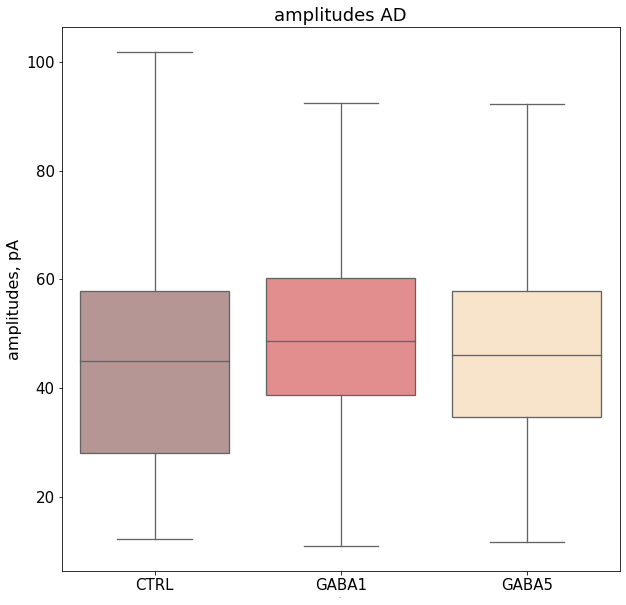

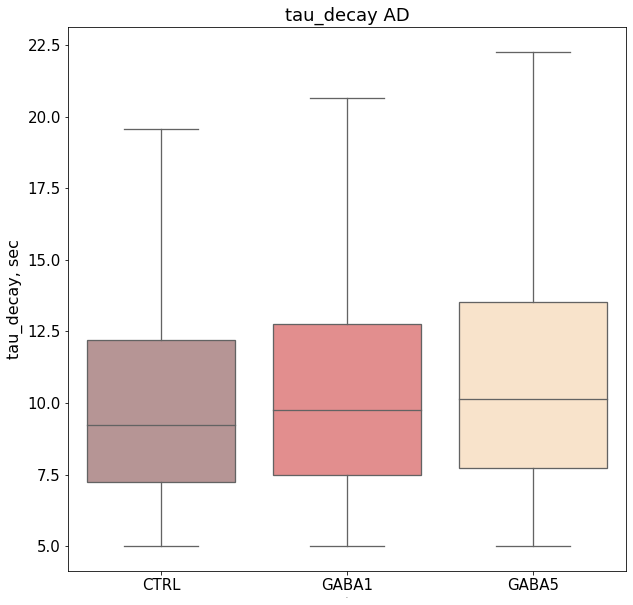

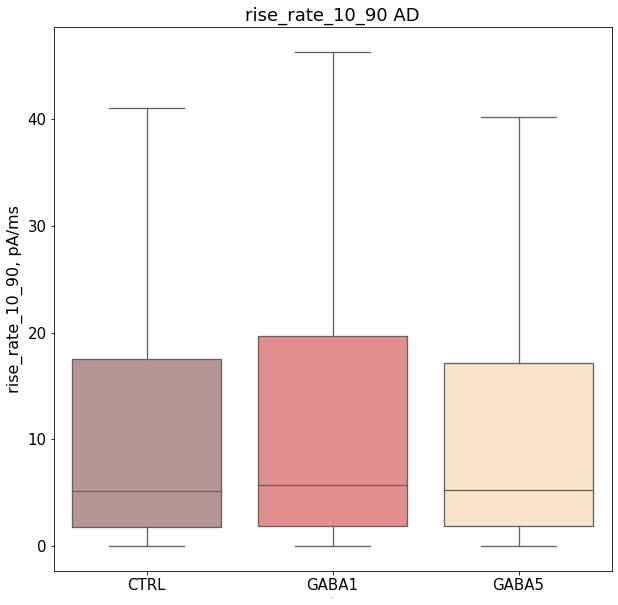

In [8]:
parametres = ['amplitudes', 'tau_decay', 'rise_rate_10_90']
lparametres = ['amplitudes, pA', 'tau_decay, sec', 'rise_rate_10_90, pA/ms']

for p, l in zip(parametres, lparametres):
    plt.figure(figsize = (10, 10))
    ax = sns.boxplot(x='series', y=p, data=result_3ser, palette  = ['rosybrown', 'lightcoral', 'bisque', 'paleturquoise'],
                     linewidth = 1.3, showfliers=False)
    #ax.set_title(p)
    ax.set_title(p + ' AD', fontsize=18)
    ax.set_xlabel('series', fontsize=0)
    ax.set_ylabel(l, fontsize=16);
    plt.xticks(fontsize=15, rotation=0)
    plt.yticks(fontsize=15, rotation=0)
    plt.savefig('AD_common_res/'f"{p}.png")
    plt.savefig('AD_common_res/'f"{p}.pdf")
plt.show();

In [9]:
temp_pd1 = result_3ser[result_3ser.series == 'CTRL'].describe().round(3)

In [10]:
temp_pd1[['amplitudes', 'tau_decay', 'rise_rate_10_90']]

,amplitudes,tau_decay,rise_rate_10_90
count,3977.000,3977.000,3977.000
mean,46.891,10.601,13.241
std,23.904,5.058,18.272
min,12.213,5.001,0.005
25%,28.084,7.256,1.773
50%,44.998,9.224,5.120
75%,57.880,12.197,17.494
max,262.361,39.994,190.663


In [11]:
temp_pd2 = result_3ser[result_3ser.series == 'GABA1'].describe().round(3)

In [12]:
temp_pd2[['amplitudes', 'tau_decay', 'rise_rate_10_90']]

,amplitudes,tau_decay,rise_rate_10_90
count,2368.000,2368.000,2368.000
mean,51.310,11.092,14.131
std,24.547,5.418,18.794
min,10.951,5.007,0.004
25%,38.692,7.497,1.873
50%,48.642,9.758,5.690
75%,60.282,12.763,19.676
max,366.326,39.586,166.378


In [13]:
temp_pd3 = result_3ser[result_3ser.series == 'GABA5'].describe().round(3)

In [14]:
temp_pd3[['amplitudes', 'tau_decay', 'rise_rate_10_90']]

,amplitudes,tau_decay,rise_rate_10_90
count,2638.000,2638.000,2638.000
mean,48.031,11.522,12.404
std,22.561,5.504,15.881
min,11.755,5.004,0.005
25%,34.736,7.726,1.852
50%,46.142,10.142,5.296
75%,57.897,13.545,17.188
max,410.777,39.548,102.353


Cumulative distributions

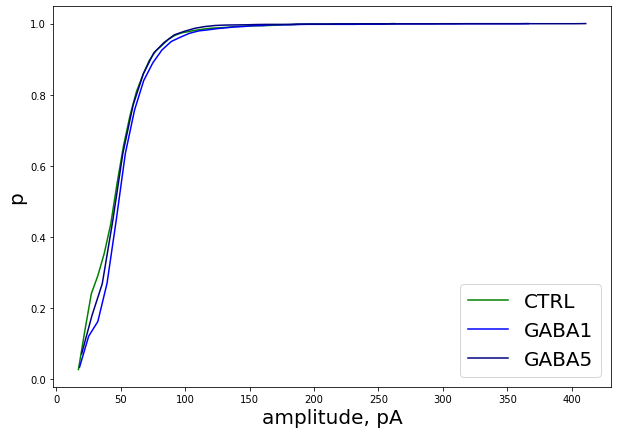

In [15]:
count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'CTRL']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA1']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA5']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('amplitude, pA', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_amplitude_p.png")
plt.savefig('AD_common_res/'"cum_amplitude_p.pdf")
plt.show()

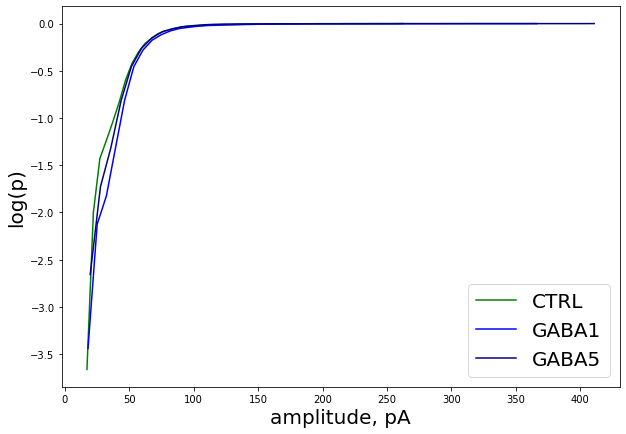

In [16]:
count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'CTRL']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], np.log(cdf), color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA1']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], np.log(cdf), color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA5']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], np.log(cdf), color = 'navy', label = 'GABA5')

plt.ylabel('log(p)', fontdict={'fontsize': 20})
plt.xlabel('amplitude, pA', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_amplitude_logp.png")
plt.savefig('AD_common_res/'"cum_amplitude_logp.pdf")
plt.show()

In [17]:
cum_tau_ctrl = result_3ser[result_3ser['series'] == 'CTRL']['tau_decay'][np.isfinite(result_3ser[result_3ser['series'] == 'CTRL']['tau_decay'])]
cum_tau_gaba1 = result_3ser[result_3ser['series'] == 'GABA1']['tau_decay'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA1']['tau_decay'])]
cum_tau_gaba5 = result_3ser[result_3ser['series'] == 'GABA5']['tau_decay'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA5']['tau_decay'])]

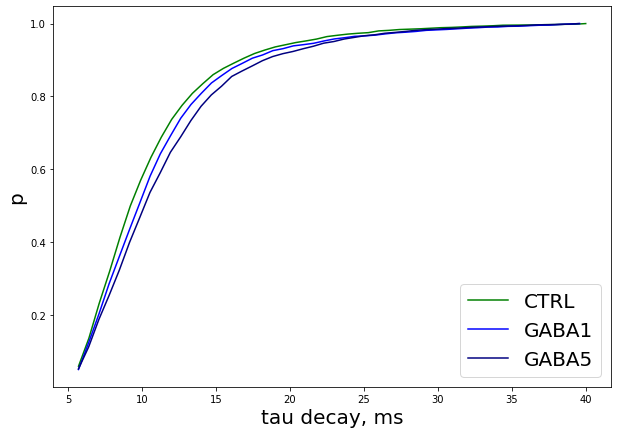

In [18]:
count, bins_count = np.histogram(np.array(cum_tau_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_tau_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_tau_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('tau decay, ms', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_tau_p.png")
plt.savefig('AD_common_res/'"cum_tau_p.pdf")
plt.show()

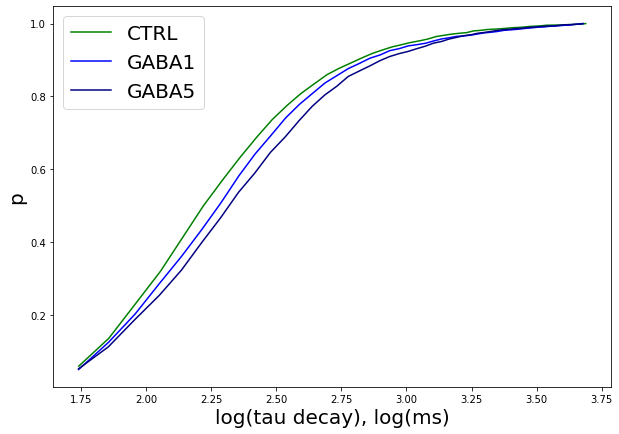

In [19]:
count, bins_count = np.histogram(np.array(cum_tau_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(np.log(bins_count[1:]), cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_tau_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_tau_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('log(tau decay), log(ms)', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_tau_logp.png")
plt.savefig('AD_common_res/'"cum_tau_logp.pdf")
plt.show()

In [20]:
cum_rise_ctrl = result_3ser[result_3ser['series'] == 'CTRL']['rise_rate_10_90'][np.isfinite(result_3ser[result_3ser['series'] == 'CTRL']['rise_rate_10_90'])]
cum_rise_gaba1 = result_3ser[result_3ser['series'] == 'GABA1']['rise_rate_10_90'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA1']['rise_rate_10_90'])]
cum_rise_gaba5 = result_3ser[result_3ser['series'] == 'GABA5']['rise_rate_10_90'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA5']['rise_rate_10_90'])]

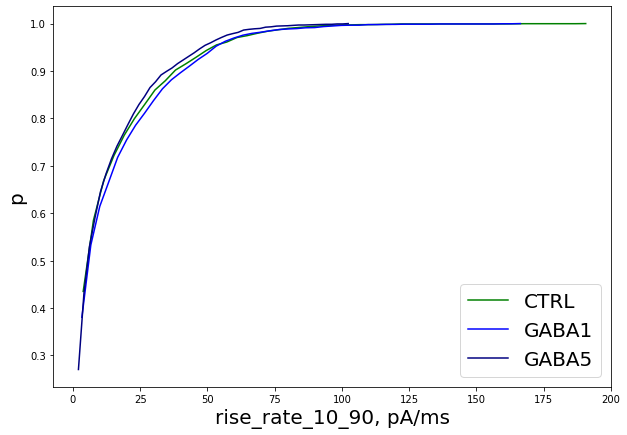

In [21]:
count, bins_count = np.histogram(np.array(cum_rise_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_rise_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_rise_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('rise_rate_10_90, pA/ms', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_rise_p.png")
plt.savefig('AD_common_res/'"cum_rise_p.pdf")
plt.show()

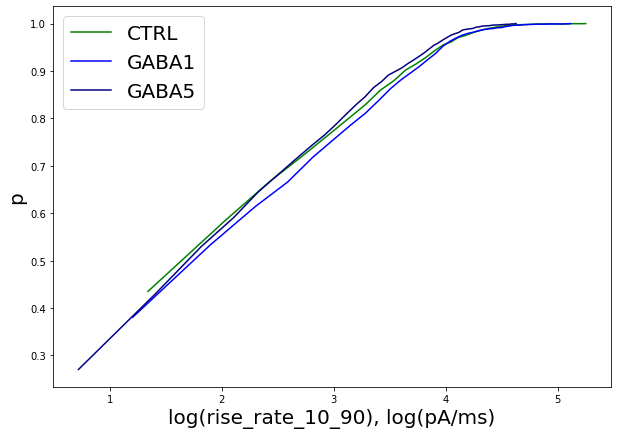

In [22]:
count, bins_count = np.histogram(np.array(cum_rise_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(np.log(bins_count[1:]), cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_rise_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_rise_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('log(rise_rate_10_90), log(pA/ms)', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_rise_logp.png")
plt.savefig('AD_common_res/'"cum_rise_logp.pdf")
plt.show()

In [23]:
electric_cell1_param = pd.read_csv('Cell 1 ad4\electric_cell_param.csv')
electric_cell2_param = pd.read_csv('Cell 2 ad4\electric_cell_param.csv')
electric_cell3_param = pd.read_csv('Cell 3 ad4\electric_cell_param.csv')
electric_cell4_param = pd.read_csv('Cell 4 ad4\electric_cell_param.csv')
electric_cell5_param = pd.read_csv('Cell 5 ad4\electric_cell_param.csv')
electric_cell6_param = pd.read_csv('Cell 6 ad4\electric_cell_param.csv')
electric_cell7_param = pd.read_csv('Cell 7 ad4\electric_cell_param.csv')

In [24]:
r_s_cell1 = np.array(electric_cell1_param['R_s, Mohm'])
r_s_cell2 = np.array(electric_cell2_param['R_s, Mohm'])
r_s_cell3 = np.array(electric_cell3_param['R_s, Mohm'])
r_s_cell4 = np.array(electric_cell4_param['R_s, Mohm'])

r_s_cell5 = np.array(electric_cell5_param['R_s, Mohm'])
r_s_cell6 = np.array(electric_cell6_param['R_s, Mohm'])
r_s_cell7 = np.array(electric_cell7_param['R_s, Mohm'])

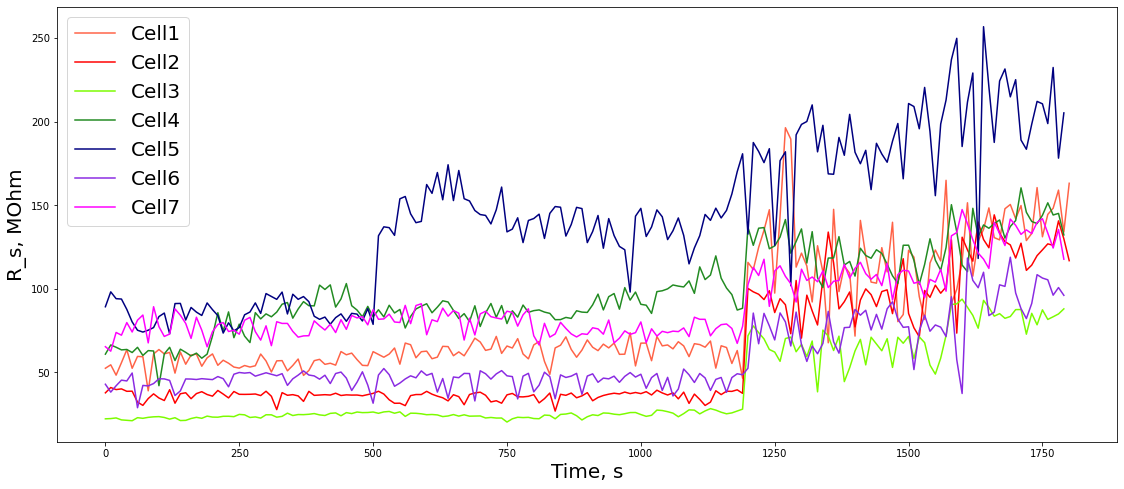

In [25]:
SamplingRate = 998.4026410869866

plt.figure(figsize=(19,8))
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell1))], r_s_cell1, color='tomato', label = 'Cell1')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell2))], r_s_cell2, color='red', label = 'Cell2')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell3))], r_s_cell3, color='lawngreen', label = 'Cell3')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell4))], r_s_cell4, color='forestgreen', label = 'Cell4')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell5))], r_s_cell5, color='navy', label = 'Cell5')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell6))], r_s_cell6, color='blueviolet', label = 'Cell6')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell7))], r_s_cell7, color='fuchsia', label = 'Cell7')

plt.xlabel('Time, s', fontdict={'fontsize': 20})
plt.ylabel('R_s, MOhm', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"R_s_common.png")
plt.savefig('AD_common_res/'"R_s_common.pdf")
plt.show()

In [26]:
c_cell1 = np.array(electric_cell1_param['C, pF'])
c_cell2 = np.array(electric_cell2_param['C, pF'])
c_cell3 = np.array(electric_cell3_param['C, pF'])
c_cell4 = np.array(electric_cell4_param['C, pF'])
c_cell5 = np.array(electric_cell5_param['C, pF'])
c_cell6 = np.array(electric_cell6_param['C, pF'])
c_cell7 = np.array(electric_cell7_param['C, pF'])

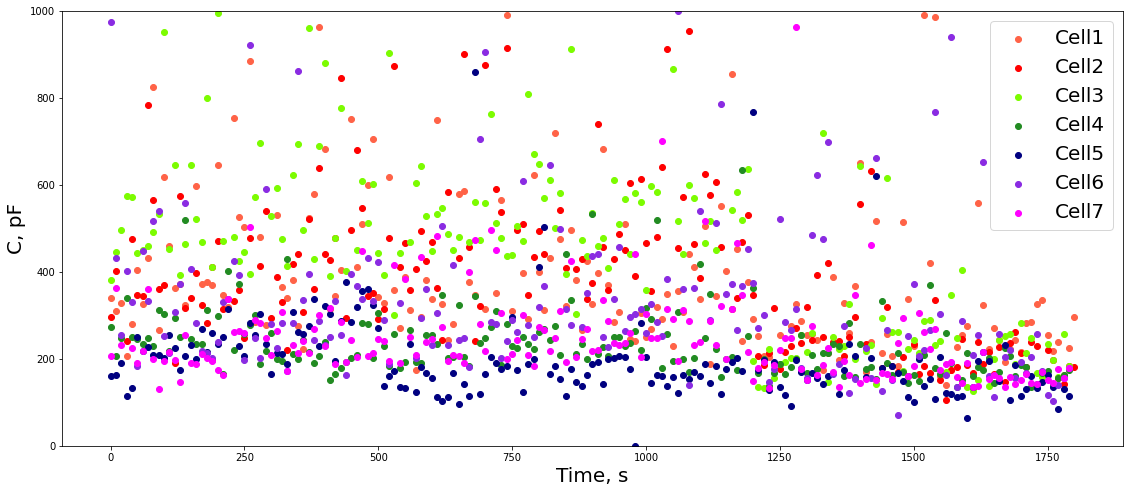

In [27]:
SamplingRate = 998.4026410869866

plt.figure(figsize=(19,8))
plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell1))], c_cell1, color='tomato', label = 'Cell1')
plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell2))], c_cell2, color='red', label = 'Cell2')
plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell3))], c_cell3, color='lawngreen', label = 'Cell3')
plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell4))], c_cell4, color='forestgreen', label = 'Cell4')
plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell5))], c_cell5, color='navy', label = 'Cell5')
plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell6))], c_cell6, color='blueviolet', label = 'Cell6')
plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell7))], c_cell7, color='fuchsia', label = 'Cell7')

plt.xlabel('Time, s', fontdict={'fontsize': 20})
plt.ylabel('C, pF', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.ylim(0,1000)
plt.show()

In [28]:
baseline_cell1_param = pd.read_csv(r'Cell 1 ad4\baseline_param.csv')
baseline_cell2_param = pd.read_csv(r'Cell 2 ad4\baseline_param.csv')
baseline_cell3_param = pd.read_csv(r'Cell 3 ad4\baseline_param.csv')
baseline_cell4_param = pd.read_csv(r'Cell 4 ad4\baseline_param.csv')
baseline_cell5_param = pd.read_csv(r'Cell 5 ad4\baseline_param.csv')
baseline_cell6_param = pd.read_csv(r'Cell 6 ad4\baseline_param.csv')
baseline_cell7_param = pd.read_csv(r'Cell 7 ad4\baseline_param.csv')

In [29]:
i_h_cell1 = np.array(baseline_cell1_param['Ihold, pA'])
i_h_cell2 = np.array(baseline_cell2_param['Ihold, pA'])
i_h_cell3 = np.array(baseline_cell3_param['Ihold, pA'])
i_h_cell4 = np.array(baseline_cell4_param['Ihold, pA'])

i_h_cell5 = np.array(baseline_cell5_param['Ihold, pA'])
i_h_cell6 = np.array(baseline_cell6_param['Ihold, pA'])
i_h_cell7 = np.array(baseline_cell7_param['Ihold, pA'])

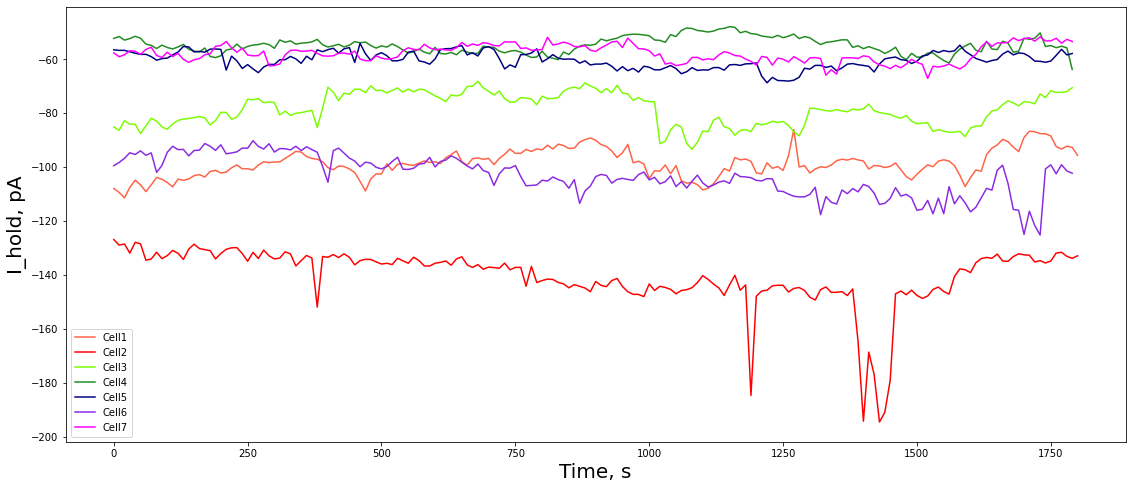

In [30]:
SamplingRate = 998.4026410869866

plt.figure(figsize=(19,8))
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell1))], i_h_cell1, color='tomato', label = 'Cell1')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell2))], i_h_cell2, color='red', label = 'Cell2')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell3))], i_h_cell3, color='lawngreen', label = 'Cell3')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell4))], i_h_cell4, color='forestgreen', label = 'Cell4')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell5))], i_h_cell5, color='navy', label = 'Cell5')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell6))], i_h_cell6, color='blueviolet', label = 'Cell6')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell7))], i_h_cell7, color='fuchsia', label = 'Cell7')

plt.xlabel('Time, s', fontdict={'fontsize': 20})
plt.ylabel('I_hold, pA', fontdict={'fontsize': 20})
plt.legend(fontsize=10)
plt.savefig('AD_common_res/'"I_h_common.png")
plt.savefig('AD_common_res/'"I_h_common.pdf")
plt.show()

In [31]:
spont_freq_cell1 = pd.read_csv(r'Cell 1 ad4\spont_freqs.csv')
spont_freq_cell2 = pd.read_csv(r'Cell 2 ad4\spont_freqs.csv')
spont_freq_cell3 = pd.read_csv(r'Cell 3 ad4\spont_freqs.csv')
spont_freq_cell4 = pd.read_csv(r'Cell 4 ad4\spont_freqs.csv')
spont_freq_cell5 = pd.read_csv(r'Cell 5 ad4\spont_freqs.csv')
spont_freq_cell6 = pd.read_csv(r'Cell 6 ad4\spont_freqs.csv')
spont_freq_cell7 = pd.read_csv(r'Cell 7 ad4\spont_freqs.csv')

In [32]:
ar_ctrl = [spont_freq_cell1[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell2[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell3[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], 
           spont_freq_cell4[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell5[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell6[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell7[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2]]
spont_fr_ctrl = []
for ar in ar_ctrl:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_ctrl.append(ar[k][i])
spont_fr_ctrl_no_nan = [item for item in spont_fr_ctrl if not(math.isnan(item)) == True]

In [33]:
ar_gaba1 = [spont_freq_cell1[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell2[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell3[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], 
           spont_freq_cell4[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell5[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell6[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell7[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2]]
spont_fr_gaba1 = []
for ar in ar_gaba1:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba1.append(ar[k][i])
spont_fr_gaba1_no_nan = [item for item in spont_fr_gaba1 if not(math.isnan(item)) == True]

In [34]:
ar_gaba5 = [spont_freq_cell1[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell2[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell3[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], 
           spont_freq_cell4[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell5[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell6[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell7[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2]]
spont_fr_gaba5 = []
for ar in ar_gaba5:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba5.append(ar[k][i])
spont_fr_gaba5_no_nan = [item for item in spont_fr_gaba5 if not(math.isnan(item)) == True]

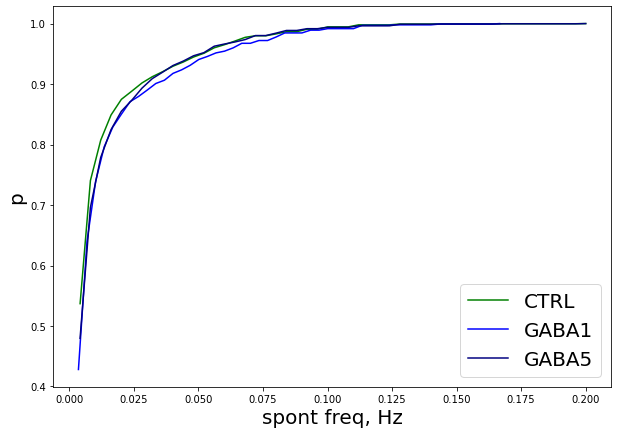

In [35]:
count, bins_count = np.histogram(np.array(np.array(spont_fr_ctrl_no_nan)), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(np.array(spont_fr_gaba1_no_nan)), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(np.array(spont_fr_gaba5_no_nan)), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('spont freq, Hz', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('AD_common_res/'"cum_spont_freq.png")
plt.savefig('AD_common_res/'"cum_spont_freq.pdf")
plt.show()